# Agrupamiento - Caso de uso

## Realizado por: Pablo Sánchez Cabrera

Se lleva a cabo un proceso proceso común a ambos ejercicios (limpieza de datos y análisis de las variables) así como el estudio de la utilidad del uso de este tipo técnicas en el dataset de Boston Housing.

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf  #sintáxis análoga a R

from sklearn import datasets
from sklearn.cluster import KMeans

Se cargan los datos

In [2]:
data = pd.read_csv("../data/HousingData.csv")
data = data.dropna() # se eliminan valores nulos existenten en el dataset

Se excluyen las variables `chas` y `rad` al ser variables categóricas. Asimismo, el target `medv` también será excluido

In [3]:
cat=["CHAS", "RAD"]
data_cat = data[cat]
data = data.drop(cat, axis=1)

y = data["MEDV"] # target
data = data.drop(columns="MEDV")

data.describe() #summary de los datos

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.553215,6.280015,68.932741,3.805268,406.431472,18.537563,358.490939,12.769112
std,9.202423,23.954082,6.908364,0.113112,0.697985,27.888705,2.098571,168.312419,2.166460,89.283295,7.308430
min,0.006320,0.000000,0.460000,0.389000,3.561000,2.900000,1.129600,187.000000,12.600000,2.600000,1.730000
25%,0.081955,0.000000,5.130000,0.453000,5.879250,45.475000,2.110100,280.250000,17.400000,376.707500,7.125000
50%,0.268880,0.000000,8.560000,0.538000,6.201500,77.700000,3.199200,330.000000,19.100000,392.190000,11.300000
75%,3.435973,12.500000,18.100000,0.624000,6.605500,94.250000,5.116700,666.000000,20.200000,396.900000,17.117500
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


Como existe mucha variabilidad entre las variables que componen el dataset se normalizan los datos

In [4]:
data_esc=StandardScaler().fit_transform(data)
data_esc=pd.DataFrame(data_esc, columns=data.columns)

data_esc.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,-1.803408e-16,2.930538e-17,-5.410224e-17,5.410224e-16,3.020708e-16,-1.442726e-16,9.017040e-18,3.606816e-17,3.967498e-16,-9.017040e-17,-3.967498e-16
std,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00
min,-4.008184e-01,-4.790512e-01,-1.527752e+00,-1.453635e+00,-3.900475e+00,-2.370734e+00,-1.276616e+00,-1.305373e+00,-2.744160e+00,-3.991155e+00,-1.512383e+00
25%,-3.925889e-01,-4.790512e-01,-8.509001e-01,-8.871071e-01,-5.749047e-01,-8.421892e-01,-8.087995e-01,-7.506392e-01,-5.257471e-01,2.042904e-01,-7.732560e-01
50%,-3.722505e-01,-4.790512e-01,-3.537692e-01,-1.346874e-01,-1.126315e-01,3.147656e-01,-2.891675e-01,-4.546821e-01,2.599410e-01,3.779196e-01,-2.012716e-01
75%,-2.765433e-02,4.344402e-02,1.028921e+00,6.265843e-01,4.669136e-01,9.089504e-01,6.257112e-01,1.544144e+00,7.683274e-01,4.307401e-01,5.957390e-01
max,9.279567e+00,3.700910e+00,2.426106e+00,2.813028e+00,3.586272e+00,1.115389e+00,3.970231e+00,1.811844e+00,1.600232e+00,4.307401e-01,3.452579e+00


Se realiza un breve `análisis descriptivo` empleando la `matriz de correlaciones de Pearson` 

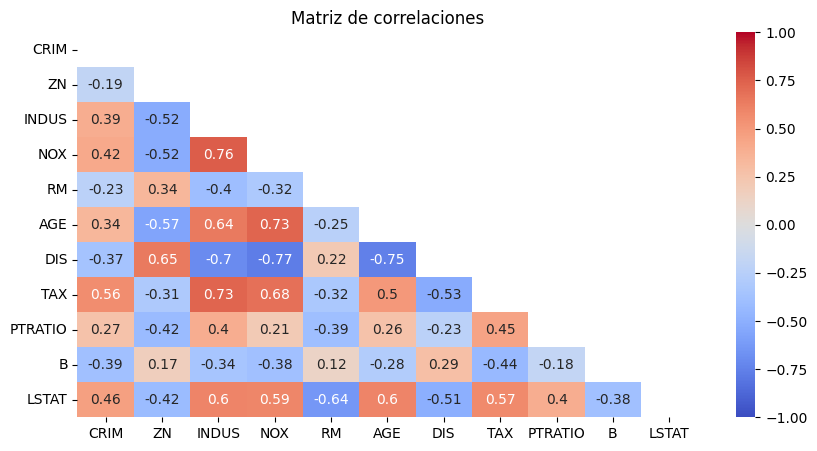

In [5]:
matriz_cor=data.corr('pearson')  #correlación de pearson

#como cor(x,x)=1 y cor(x,y)=cor(y,x) se puede disponer solo de la diagonal inferior. 
#La siguiente función elimina la parte superior de la matriz de correlaciones
mask = np.zeros(matriz_cor.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(10,5))

sns.heatmap(matriz_cor, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', mask=mask) 
#cmap para elegir la gama de colores y vmin y vmax identificar todo el espectro de valores de la correlación de pearson [-1,1]
plt.title('Matriz de correlaciones')
plt.show()

## Análisis Cluster - Algoritmo Kmeans

El análisis cluster pretende agrupar instancias según sus propias características de forma que, a priori, no se conoce una clasficación inicial (al contrario que en el Análisis Discriminante). El algoritmo kmeans es una de las técnicas de aprendizaje no supervisado

K-Means necesita que el usuario proporcione un conjunto de clusters a priori. 
Como no nos es sabido, se emplea el `gráfico del codo` para la elección del número de grupos (medida de bondad del modelo)

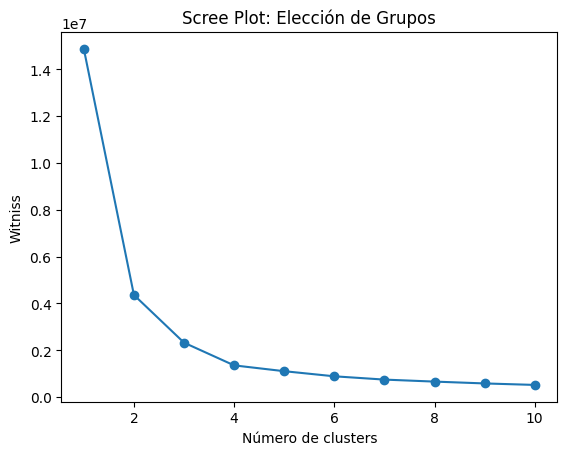

In [8]:
withniss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0) #definición del modelo
    kmeans.fit(data) #aplicación a la muestra
    
    withniss.append(kmeans.inertia_)  # "inertia_" contiene el valor del SSE dentro del grupo (withniss)
    
plt.plot(range(1,11), withniss, marker='o') 
plt.xlabel('Número de clusters')
plt.ylabel('Witniss')
plt.title('Scree Plot: Elección de Grupos')
plt.show()

Teniendo en cuenta el gráfico anterior se eligen 4 grupos

In [9]:
n = 4 # a la vist del gráfico anterior, se eligen 4 grupos
kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans = kmeans.fit(data)

`Centroides`

In [10]:
centroide = kmeans.cluster_centers_ #centroides
df = pd.DataFrame(centroide, columns=data.columns) #dataframe
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.687931,1.346386e+01,12.171687,0.562976,6.211759,70.722892,3.633152,400.915663,17.842169,376.022771,12.391084
1,16.483739,0.000000e+00,17.812143,0.678357,6.073250,91.117857,1.998871,646.535714,20.028571,56.592857,21.396786
2,11.143553,-1.776357e-15,18.710127,0.668443,5.928772,89.531646,2.103697,668.848101,20.193671,372.660633,18.393291
3,0.269265,1.665686e+01,6.604167,0.487446,6.472186,57.182353,4.782174,274.098039,17.974510,387.307598,9.560735


De los centroides se puede interprestar que el "cluster 4" toma bajos valores en las variables. Por su parte, el "grupo 2" es el que, en general, toma valores más altos en las variables de interés

Una vez se tienen categorizadas las viviendas en diferentes grupos nos preguntamos si existen diferencias en términos del precio en cada uno de ellos. Para esto, realizamos un `Análisis de la Varianza` sobre `MEDV`

Como tenemos los índices y las etiquetas de los grupos se define un diccionario con:
- Clave: el nombre de los estados
- Valor: el id del cluster

In [17]:
viviendas_cluster = {}
for cluster, nombre in zip(kmeans.labels_, data.index):
    viviendas_cluster[nombre] = cluster

In [24]:
cluster_df = pd.DataFrame(viviendas_cluster, index=[0]).rename(index={0: "cluster"}).T
cluster_df.value_counts(normalize=True)

cluster
3          0.517766
0          0.210660
2          0.200508
1          0.071066
Name: proportion, dtype: float64

Como podemos ver, más de la mitad del total de las viviendas se han agrupado en un único cluster. 

`Boxplot "MEDV" en función de los grupos`

<Axes: xlabel='cluster', ylabel='MEDV'>

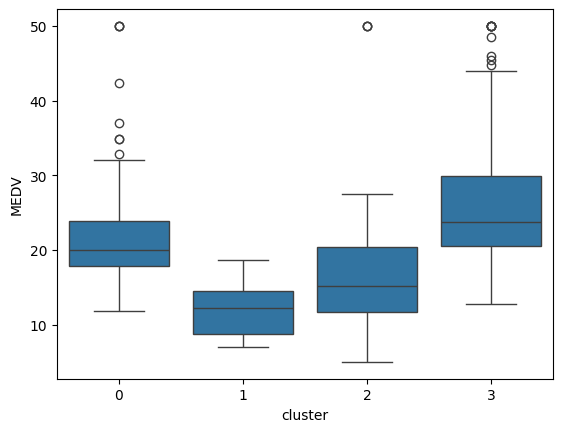

In [31]:
cluster_medv_df = pd.concat([cluster_df, y], axis=1)
cluster_medv_df["cluster"] = cluster_medv_df["cluster"].astype("category")

sns.boxplot(cluster_medv_df, x="cluster", y="MEDV")

A simple vista se observa que las medianas de los grupos son muy diferentes entre sí (además de diferente volatilidad del precio entre los grupos).
Puede verse también la existencia de valores atípicos en los grupos más numerosos.

Por otro lado, analizamos la variable "MEDV" y su comportamiento

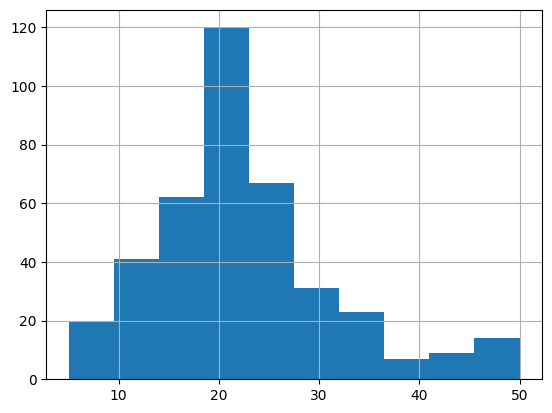

In [33]:
cluster_medv_df["MEDV"].hist()
plt.show()

A partir del resultado del histograma, se considera más adecuado `tomar logaritmos` sobre el target previo a realizar el `análisis de la varianza`

In [42]:
cluster_medv_df["MEDV_log"] = np.log(cluster_medv_df["MEDV"])

sns.boxplot(cluster_medv_df, x="cluster", y="MEDV_log")

In [47]:
anova = smf.ols('MEDV_log ~ 0 + C(cluster)', data=cluster_medv_df).fit()  #C para identificar el factor
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     69.79
Date:                Thu, 02 May 2024   Prob (F-statistic):           3.79e-36
Time:                        16:19:40   Log-Likelihood:                -127.69
No. Observations:                 394   AIC:                             263.4
Df Residuals:                     390   BIC:                             279.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(cluster)[0]     3.0592      0.037     82.876

A partir del modelo lineal se observa la diferencia existente que existe en el precio de la vivienda entre los diferentes grupos